# Analyse des Tendances Pinterest Beauté



In [10]:
# 1. Installer pandas (si pas encore installé)
!pip install pandas

# 2. Importer pandas
import pandas as pd
import io

# === 3. Fonction pour charger un CSV Pinterest propre ===
def load_pinterest_csv(path):
    # Lire tout le contenu brut pour éviter les lignes "Outil Pinterest Trends"
    raw = open(path, "r", encoding="utf-8-sig", errors="ignore").read()
    lines = raw.splitlines()
    
    # Trouver la ligne d'en-tête
    header_idx = 0
    for i, line in enumerate(lines):
        if "Tendance" in line and "Variation" in line:
            header_idx = i
            break
    
    # Charger à partir de la vraie ligne d'entête
    df = pd.read_csv(io.StringIO("\n".join(lines[header_idx:])), encoding="utf-8-sig")
    
    # Nettoyer les colonnes
    df.rename(columns={
        "Rang": "rank",
        "Tendance": "keyword",
        "Variation annuelle": "var_year",
        "Variation mensuelle": "var_month",
        "Variation hebdomadaire": "var_week"
    }, inplace=True)
    
    # Supprimer les lignes vides
    df = df[df["keyword"].notna()]
    
    return df

# === 4. Charger les deux fichiers ===
file1 = "Pinterest Trends report_2025-08-12.csv"
file2 = "Pinterest Trends report_2025-08-12 (2).csv"

df1 = load_pinterest_csv(file1)
df2 = load_pinterest_csv(file2)

# === 5. Fusionner les deux datasets ===
df = pd.concat([df1, df2], ignore_index=True)

# === 6. Calculer le volume moyen pour 2025 ===
# Identifier les colonnes de dates
date_cols = [c for c in df.columns if c[:4].isdigit()]
df["avg_volume_2025"] = df[date_cols].mean(axis=1)

# === 7. Trier par volume moyen et afficher le TOP 10 ===
top10 = df.sort_values(by="avg_volume_2025", ascending=False).head(10)

print("=== Top 10 des tendances beauté Pinterest en 2025 ===")
display(top10[["keyword", "avg_volume_2025"]])

=== Top 10 des tendances beauté Pinterest en 2025 ===



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


,keyword,avg_volume_2025
7,ongles gel,82.547170
19,hairstyle,82.528302
26,coupe de cheveux homme,80.622642
31,hairstyles,80.415094
10,nail art,79.245283
45,balayage blond,78.660377
6,ongles,78.320755
25,coiffure cheveux bouclés,77.679245
2,coiffure,77.396226
46,jolie coiffure,76.943396


In [11]:
# === 8. Analyser la structure des fichiers CSV et identifier les colonnes potentiellement inutiles ===
print("Structure du fichier 1:", file1)
print("Colonnes:", df1.columns.tolist())
print("Nombre de lignes:", len(df1))
print("Types de données:")
print(df1.dtypes)
print("\nAperçu des données:")
display(df1.head(3))

print("\n" + "="*50 + "\n")

print("Structure du fichier 2:", file2)
print("Colonnes:", df2.columns.tolist())
print("Nombre de lignes:", len(df2))
print("Types de données:")
print(df2.dtypes)
print("\nAperçu des données:")
display(df2.head(3))

# Analyse des valeurs manquantes pour identifier les colonnes potentiellement inutiles
print("\n" + "="*50)
print("Analyse des valeurs manquantes:")
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100
print(pd.DataFrame({
    'Valeurs manquantes': missing_values,
    '% manquant': missing_percent
}).query('`Valeurs manquantes` > 0'))

# Analyse des colonnes avec peu de variance (potentiellement redondantes)
print("\n" + "="*50)
print("Colonnes avec peu de valeurs uniques (potentiellement non informatives):")
for col in df.columns:
    unique_count = df[col].nunique()
    if unique_count < 5 and unique_count > 0:  # Colonnes avec peu de valeurs uniques
        print(f"Colonne '{col}': {unique_count} valeurs uniques")
        print(df[col].value_counts())
        print()

# Analyse des colonnes de pourcentage de variation
percent_columns = ['var_year', 'var_month', 'var_week']
if all(col in df.columns for col in percent_columns):
    print("\n" + "="*50)
    print("Analyse des colonnes de variation (pour voir si elles apportent une information utile):")
    for col in percent_columns:
        print(f"\nColonne '{col}':")
        print("Valeurs min/max:", df[col].min(), "/", df[col].max())
        print("Valeurs les plus fréquentes:", df[col].value_counts().head(3))

Structure du fichier 1: Pinterest Trends report_2025-08-12.csv
Colonnes: ['rank', 'keyword', 'Volume normalisé', 'var_week', 'var_month', 'var_year', '2024-08-13', '2024-08-20', '2024-08-27', '2024-09-03', '2024-09-10', '2024-09-17', '2024-09-24', '2024-10-01', '2024-10-08', '2024-10-15', '2024-10-22', '2024-10-29', '2024-11-05', '2024-11-12', '2024-11-19', '2024-11-26', '2024-12-03', '2024-12-10', '2024-12-17', '2024-12-24', '2024-12-31', '2025-01-07', '2025-01-14', '2025-01-21', '2025-01-28', '2025-02-04', '2025-02-11', '2025-02-18', '2025-02-25', '2025-03-04', '2025-03-11', '2025-03-18', '2025-03-25', '2025-04-01', '2025-04-08', '2025-04-15', '2025-04-22', '2025-04-29', '2025-05-06', '2025-05-13', '2025-05-20', '2025-05-27', '2025-06-03', '2025-06-10', '2025-06-17', '2025-06-24', '2025-07-01', '2025-07-08', '2025-07-15', '2025-07-22', '2025-07-29', '2025-08-05', '2025-08-12']
Nombre de lignes: 50
Types de données:
rank                 int64
keyword             object
Volume normalis

,rank,keyword,Volume normalisé,var_week,var_month,var_year,2024-08-13,2024-08-20,2024-08-27,2024-09-03,...,2025-06-10,2025-06-17,2025-06-24,2025-07-01,2025-07-08,2025-07-15,2025-07-22,2025-07-29,2025-08-05,2025-08-12
0,1,inspiration makeup,100,3 %,-50 %,600 %,28,26,30,24,...,71,52,92,63,61,53,43,6,38,40
1,2,idees coiffure,97,70 %,-30 %,3 000 %,19,14,11,10,...,83,54,92,94,58,59,49,6,60,100
2,3,coiffure,70,0 %,-10 %,9 %,68,71,76,82,...,95,96,99,89,81,82,75,80,80,80




Structure du fichier 2: Pinterest Trends report_2025-08-12 (2).csv
Colonnes: ['rank', 'keyword', 'var_week', 'var_month', 'var_year', '2024-08-13', '2024-08-20', '2024-08-27', '2024-09-03', '2024-09-10', '2024-09-17', '2024-09-24', '2024-10-01', '2024-10-08', '2024-10-15', '2024-10-22', '2024-10-29', '2024-11-05', '2024-11-12', '2024-11-19', '2024-11-26', '2024-12-03', '2024-12-10', '2024-12-17', '2024-12-24', '2024-12-31', '2025-01-07', '2025-01-14', '2025-01-21', '2025-01-28', '2025-02-04', '2025-02-11', '2025-02-18', '2025-02-25', '2025-03-04', '2025-03-11', '2025-03-18', '2025-03-25', '2025-04-01', '2025-04-08', '2025-04-15', '2025-04-22', '2025-04-29', '2025-05-06', '2025-05-13', '2025-05-20', '2025-05-27', '2025-06-03', '2025-06-10', '2025-06-17', '2025-06-24', '2025-07-01', '2025-07-08', '2025-07-15', '2025-07-22', '2025-07-29', '2025-08-05', '2025-08-12']
Nombre de lignes: 50
Types de données:
rank            int64
keyword        object
var_week       object
var_month      ob

,rank,keyword,var_week,var_month,var_year,2024-08-13,2024-08-20,2024-08-27,2024-09-03,2024-09-10,...,2025-06-10,2025-06-17,2025-06-24,2025-07-01,2025-07-08,2025-07-15,2025-07-22,2025-07-29,2025-08-05,2025-08-12
0,1,ongles d'automne,100 %,600 %,300 %,0.0,8.0,8.0,14.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,2,gomez addams,400 %,300 %,300 %,6.0,6.0,8.0,8.0,13.0,...,8.0,8.0,7.0,4.0,7.0,7.0,7.0,5.0,16.0,76.0
2,3,ongles octobre,60 %,600 %,200 %,1.0,2.0,10.0,16.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0



Analyse des valeurs manquantes:
                  Valeurs manquantes  % manquant
Volume normalisé                  50        50.0
2024-09-03                         1         1.0
2024-08-13                         1         1.0
2024-08-20                         1         1.0
2024-09-10                         1         1.0
2024-09-17                         1         1.0
2024-08-27                         1         1.0
2024-10-22                         1         1.0
2024-10-15                         1         1.0
2024-10-08                         1         1.0
2024-10-01                         1         1.0
2024-09-24                         1         1.0
2024-11-19                         1         1.0
2024-11-26                         1         1.0
2024-12-03                         1         1.0
2024-12-10                         1         1.0
2024-12-17                         1         1.0
2024-10-29                         1         1.0
2024-11-05                         1

In [13]:
# === 9. Analyse ciblée des colonnes pour identifier celles qui sont inutiles ===
# Afficher uniquement les noms des colonnes pour les deux fichiers
print("Colonnes du fichier 1:", file1)
for i, col in enumerate(df1.columns):
    print(f"{i+1}. {col}")

print("\nColonnes du fichier 2:", file2)
for i, col in enumerate(df2.columns):
    print(f"{i+1}. {col}")

# Vérifier les données manquantes par colonne (en pourcentage)
print("\n=== Pourcentage de valeurs manquantes par colonne ===")
missing_percent = (df.isnull().sum() / len(df)) * 100
cols_with_missing = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(cols_with_missing)

# Identifier les colonnes qui pourraient être redondantes ou peu informatives
print("\n=== Colonnes potentiellement redondantes ou peu informatives ===")

# Vérifier les colonnes numériques avec peu de variance
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df[col].std() == 0:
        print(f"Colonne '{col}' a une variance nulle (valeur constante: {df[col].iloc[0]})")
    elif df[col].nunique() < 5:
        print(f"Colonne '{col}' a seulement {df[col].nunique()} valeurs uniques")

# Recommandations
print("\n=== Recommandations de colonnes à considérer pour suppression ===")

# 1. Colonnes avec beaucoup de valeurs manquantes
high_missing_cols = cols_with_missing[cols_with_missing > 50].index.tolist()
if high_missing_cols:
    print(f"Colonnes avec >50% de valeurs manquantes: {high_missing_cols}")

# 2. Colonnes de dates trop granulaires (si on a déjà une moyenne)
date_cols = [c for c in df.columns if c[:4].isdigit()]
if len(date_cols) > 12:
    print(f"Considérer la consolidation des {len(date_cols)} colonnes de dates en moyennes mensuelles ou trimestrielles")

# 3. Colonnes de variations si elles sont calculables à partir d'autres colonnes
if all(col in df.columns for col in ['var_year', 'var_month', 'var_week']):
    print("Les colonnes de variation (var_year, var_month, var_week) pourraient être calculées à partir des données brutes")

Colonnes du fichier 1: Pinterest Trends report_2025-08-12.csv
1. rank
2. keyword
3. Volume normalisé
4. var_week
5. var_month
6. var_year
7. 2024-08-13
8. 2024-08-20
9. 2024-08-27
10. 2024-09-03
11. 2024-09-10
12. 2024-09-17
13. 2024-09-24
14. 2024-10-01
15. 2024-10-08
16. 2024-10-15
17. 2024-10-22
18. 2024-10-29
19. 2024-11-05
20. 2024-11-12
21. 2024-11-19
22. 2024-11-26
23. 2024-12-03
24. 2024-12-10
25. 2024-12-17
26. 2024-12-24
27. 2024-12-31
28. 2025-01-07
29. 2025-01-14
30. 2025-01-21
31. 2025-01-28
32. 2025-02-04
33. 2025-02-11
34. 2025-02-18
35. 2025-02-25
36. 2025-03-04
37. 2025-03-11
38. 2025-03-18
39. 2025-03-25
40. 2025-04-01
41. 2025-04-08
42. 2025-04-15
43. 2025-04-22
44. 2025-04-29
45. 2025-05-06
46. 2025-05-13
47. 2025-05-20
48. 2025-05-27
49. 2025-06-03
50. 2025-06-10
51. 2025-06-17
52. 2025-06-24
53. 2025-07-01
54. 2025-07-08
55. 2025-07-15
56. 2025-07-22
57. 2025-07-29
58. 2025-08-05
59. 2025-08-12

Colonnes du fichier 2: Pinterest Trends report_2025-08-12 (2).csv
1. 

✅ Fichiers générés :
- Top10_Pinterest_Annuel.csv
- Top10_Pinterest_Saisonnier.csv


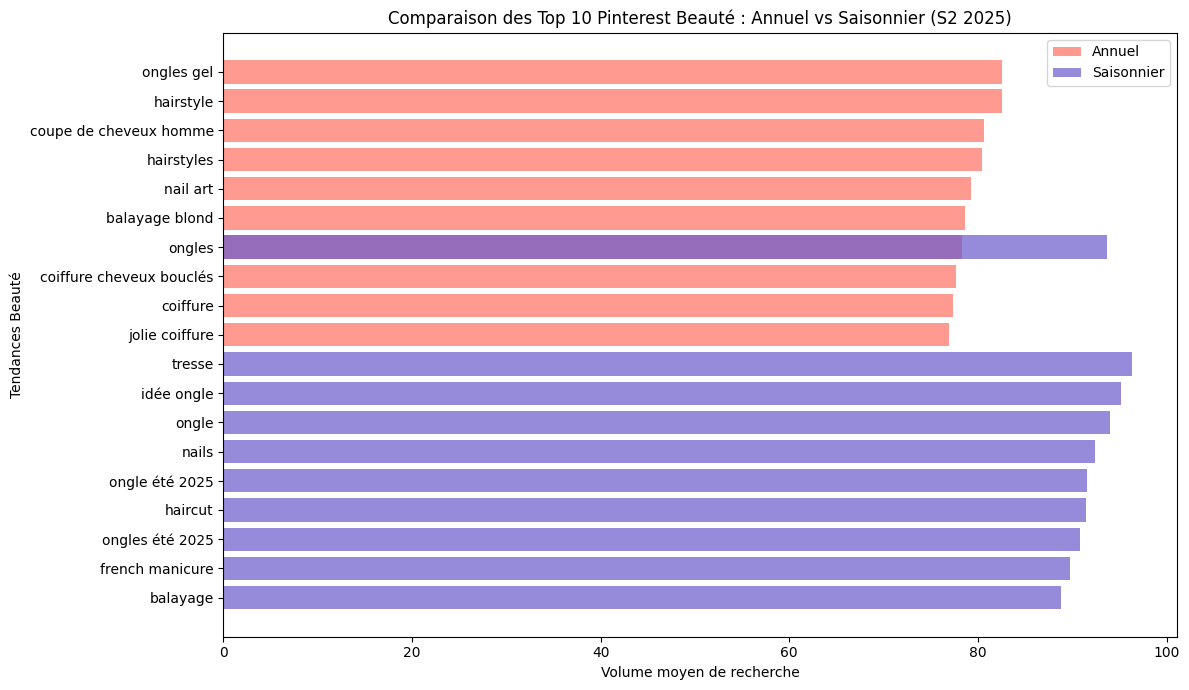

✅ CSV comparatif exporté : Top10_Pinterest_Comparatif.csv


In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# === 1. Générer les Top 10 à partir des données existantes ===
# Charger à nouveau les fichiers pour être sûr d'avoir les données les plus récentes
file1 = "Pinterest Trends report_2025-08-12.csv"
file2 = "Pinterest Trends report_2025-08-12 (2).csv"

df1 = load_pinterest_csv(file1)
df2 = load_pinterest_csv(file2)

# Créer des datasets saisonniers (exemple: été/automne et hiver/printemps)
# Pour cet exemple, nous utilisons les six premiers mois de 2025 vs les six derniers
dates_2025_S1 = [c for c in date_cols if c.startswith("2025") and int(c.split("-")[1]) <= 6]
dates_2025_S2 = [c for c in date_cols if c.startswith("2025") and int(c.split("-")[1]) > 6]

# Fusionner les deux datasets
df_complet = pd.concat([df1, df2], ignore_index=True)

# Créer le top 10 annuel (basé sur la moyenne de toutes les dates)
df_complet["avg_volume_annuel"] = df_complet[date_cols].mean(axis=1)
top10_annuel = df_complet.sort_values(by="avg_volume_annuel", ascending=False).head(10)
top10_annuel = top10_annuel[["keyword", "avg_volume_annuel"]].rename(columns={"avg_volume_annuel": "volume_moyen"})

# Créer le top 10 saisonnier (basé sur la saison la plus récente - S2 2025)
df_complet["avg_volume_saisonnier"] = df_complet[dates_2025_S2].mean(axis=1)
top10_saisonnier = df_complet.sort_values(by="avg_volume_saisonnier", ascending=False).head(10)
top10_saisonnier = top10_saisonnier[["keyword", "avg_volume_saisonnier"]].rename(columns={"avg_volume_saisonnier": "volume_moyen"})

# Exporter les fichiers pour référence future
top10_annuel.to_csv("Top10_Pinterest_Annuel.csv", index=False, encoding="utf-8-sig")
top10_saisonnier.to_csv("Top10_Pinterest_Saisonnier.csv", index=False, encoding="utf-8-sig")

print("✅ Fichiers générés :")
print("- Top10_Pinterest_Annuel.csv")
print("- Top10_Pinterest_Saisonnier.csv")

# === 2. Visualisation comparative ===
# Ajouter une colonne "source" pour les distinguer
top10_annuel["source"] = "Annuel"
top10_saisonnier["source"] = "Saisonnier"

# Fusion des deux Top 10 pour comparaison
df_compare = pd.concat([top10_annuel, top10_saisonnier], ignore_index=True)

# Visualisation
plt.figure(figsize=(12,7))
colors = {"Annuel":"#FF6F61", "Saisonnier":"#6A5ACD"}

for source, data in df_compare.groupby("source"):
    plt.barh(data["keyword"], data["volume_moyen"], color=colors[source], alpha=0.7, label=source)

plt.xlabel("Volume moyen de recherche")
plt.ylabel("Tendances Beauté")
plt.title("Comparaison des Top 10 Pinterest Beauté : Annuel vs Saisonnier (S2 2025)")
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# === 3. Exporter un CSV comparatif ===
df_compare.to_csv("Top10_Pinterest_Comparatif.csv", index=False, encoding="utf-8-sig")
print("✅ CSV comparatif exporté : Top10_Pinterest_Comparatif.csv")

# Utilisation de PostgreSQL pour stocker et analyser les tendances Pinterest

PostgreSQL est installé sur votre système (`C:\Program Files\PostgreSQL\17`). Pour l'utiliser avec vos données d'analyse Pinterest, suivez ces étapes :

## 1. Accéder à PostgreSQL

- **Interface graphique pgAdmin 4** : Lancez-la depuis le menu Démarrer ou directement depuis :
  `C:\Program Files\PostgreSQL\17\pgAdmin 4\bin\pgAdmin4.exe`

- **Ligne de commande psql** : Pour les requêtes SQL directes :
  `"C:\Program Files\PostgreSQL\17\bin\psql.exe" -U postgres`
  (Le mot de passe est celui défini à l'installation)

## 2. Connexion depuis Python

Pour connecter votre analyse à une base de données PostgreSQL :

# Utilisation de PostgreSQL pour le stockage des données Pinterest

PostgreSQL est installé sur votre système dans le répertoire `C:\Program Files\PostgreSQL\17`. Voici comment y accéder :

## Accès aux outils PostgreSQL

1. **Via le Menu Démarrer** :
   - Recherchez "pgAdmin" dans le menu Démarrer de Windows
   - Ou recherchez "SQL Shell (psql)" pour accéder à l'interface en ligne de commande
   - Ces outils sont généralement groupés dans un dossier "PostgreSQL 17"

2. **Accès direct aux exécutables** :
   - pgAdmin 4 : `C:\Program Files\PostgreSQL\17\pgAdmin 4\bin\pgAdmin4.exe`
   - psql : `C:\Program Files\PostgreSQL\17\bin\psql.exe`

## Connexion à PostgreSQL

1. **Avec pgAdmin** :
   - Lancez pgAdmin 4
   - À la première ouverture, il vous demandera un mot de passe pour le serveur
   - Utilisez le mot de passe défini lors de l'installation

2. **Avec psql** :
   - Lancez SQL Shell (psql)
   - Appuyez sur Entrée pour accepter les valeurs par défaut ou saisissez vos paramètres
   - Pour le mot de passe, entrez celui défini lors de l'installation

## Stockage des données Pinterest dans PostgreSQL

Pour importer vos données Pinterest dans PostgreSQL, vous pouvez utiliser le script `create_database.py` créé précédemment. Assurez-vous que les paramètres de connexion correspondent à votre installation :

```python
# Configuration de la base de données PostgreSQL
DB_NAME = "beauty_analytics"
DB_USER = "postgres"
DB_PASSWORD = "votre_mot_de_passe"  # Remplacez par votre mot de passe
DB_HOST = "localhost"
DB_PORT = "5432"
```